In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y') # Specify the correct format for the 'Date' column (day-month-year)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [ ]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['Returns'] = data['Close'].pct_change()
data['Price_Change'] = data['Close'].diff()
data['Volatility'] = data['Close'].pct_change().rolling(window=20).std()

In [ ]:
data['SMA_50'].fillna(method='ffill', inplace=True)
data['SMA_200'].fillna(method='ffill', inplace=True)
data['Returns'].fillna(method='ffill', inplace=True)
data['Price_Change'].fillna(method='ffill', inplace=True)
data['Volatility'].fillna(method='ffill', inplace=True)

<ipython-input-13-171636afe651>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SMA_50'].fillna(method='ffill', inplace=True)
<ipython-input-13-171636afe651>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['SMA_50'].fillna(method='ffill', inplace=True)
<ipython-input-13-171636afe651>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,Returns,Price_Change,Volatility
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN,NaN
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN,0.005374,0.315716,NaN
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN,0.011102,0.655712,NaN
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN,0.010454,0.624286,NaN
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN,-0.001586,-0.095714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,259.6744,216.52925,0.016318,4.559998,0.011232
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,260.6424,217.04605,0.000951,0.269989,0.010795
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,261.7342,217.58705,0.019840,5.640015,0.011062
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,262.8428,218.11740,-0.000379,-0.110016,0.010918


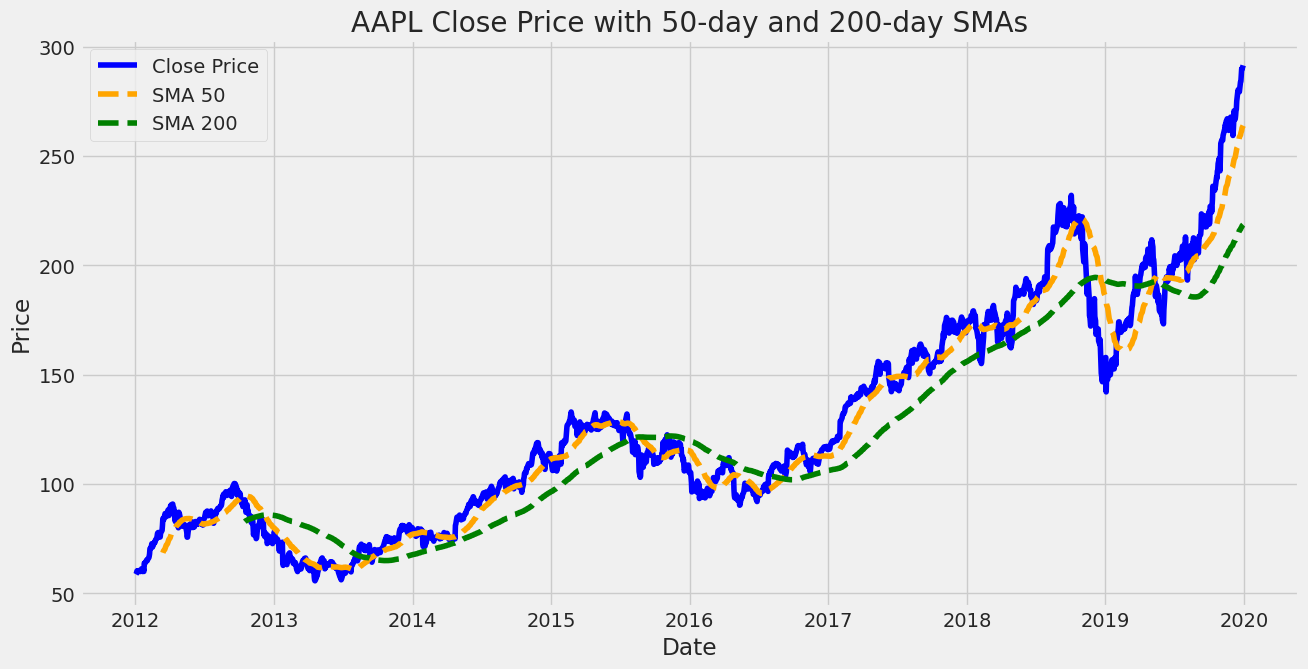

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['SMA_50'], label='SMA 50', color='orange', linestyle='--')
plt.plot(data['Date'], data['SMA_200'], label='SMA 200', color='green', linestyle='--')
plt.title('AAPL Close Price with 50-day and 200-day SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

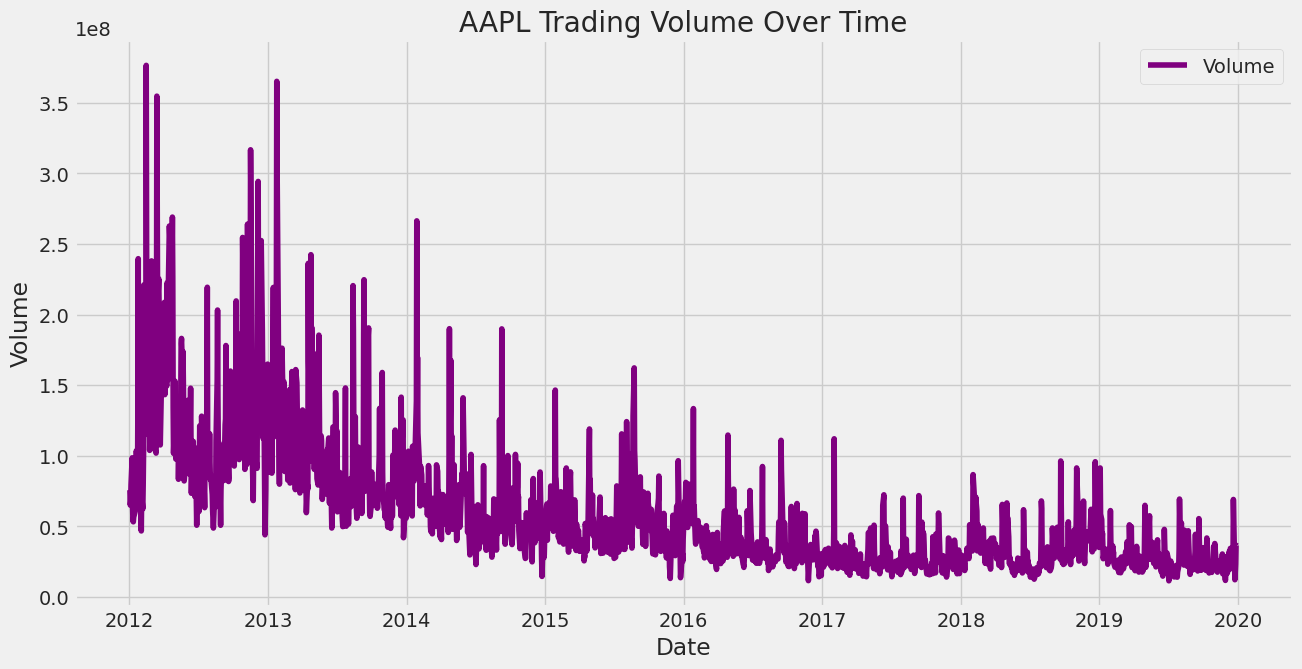

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volume'], label='Volume', color='purple')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

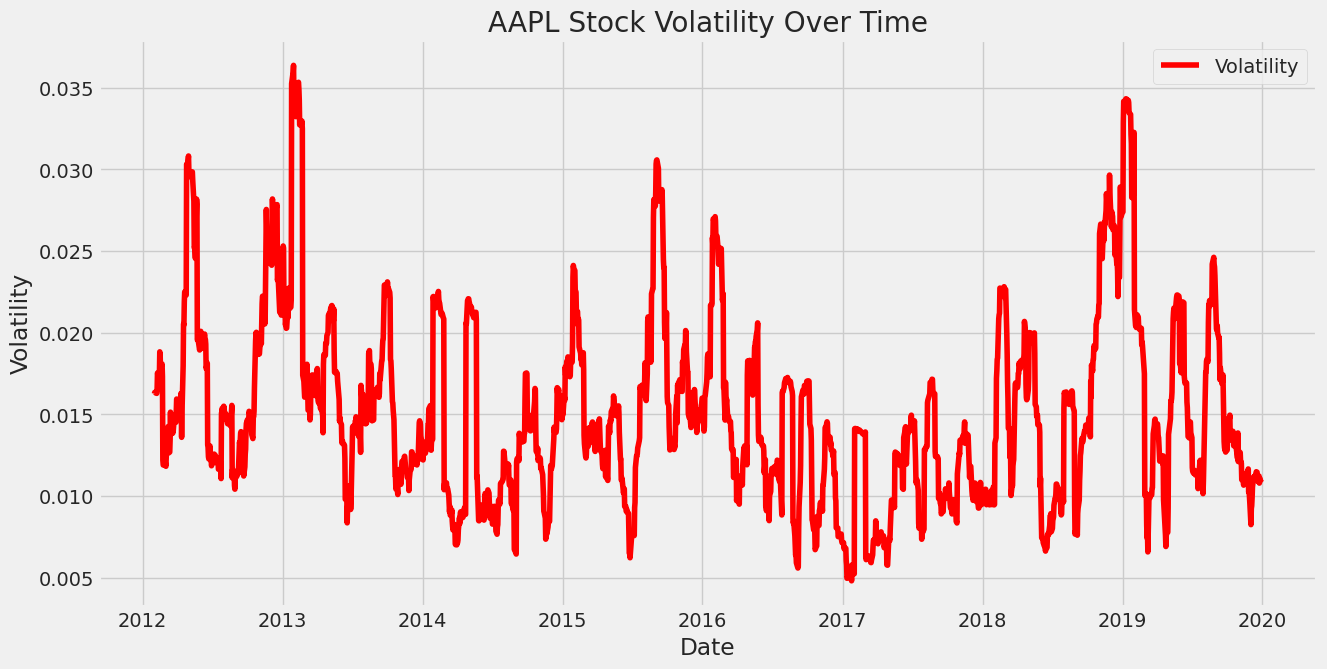

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volatility'], label='Volatility', color='red')
plt.title('AAPL Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

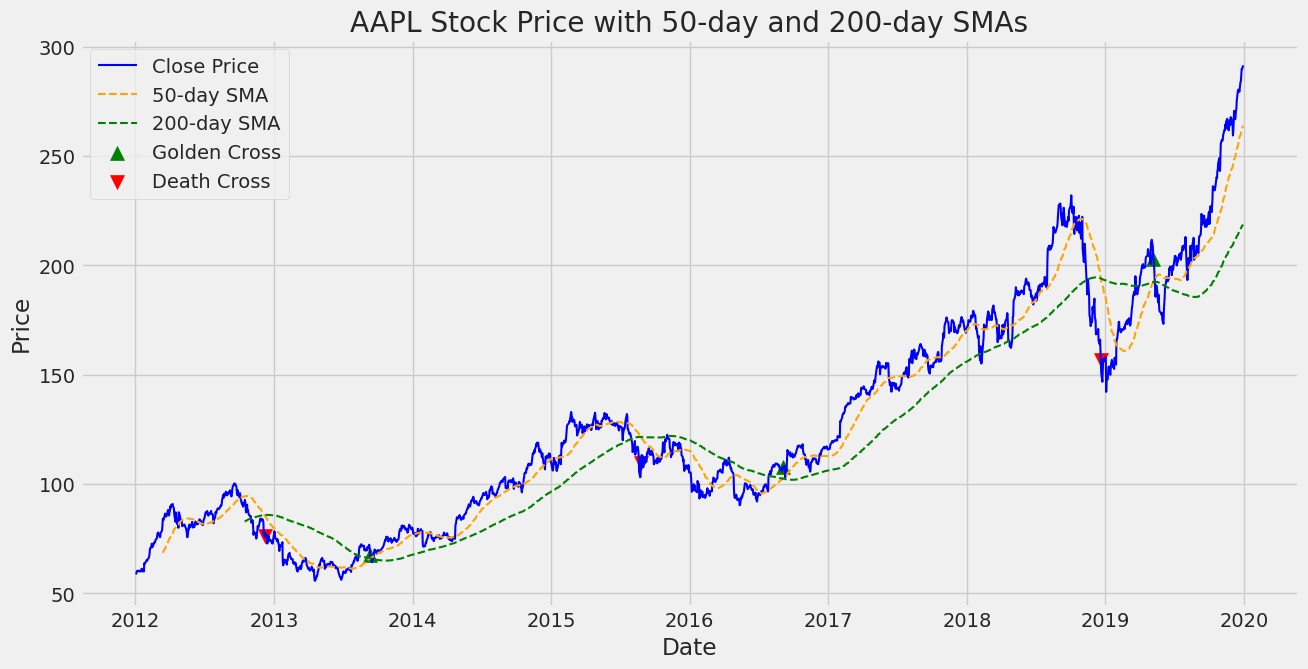

In [ ]:
import matplotlib.pyplot as plt

# Plotting Close price along with SMA_50 and SMA_200
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', linewidth=1.5)
plt.plot(data['Date'], data['SMA_50'], label='50-day SMA', color='orange', linestyle='--', linewidth=1.5)
plt.plot(data['Date'], data['SMA_200'], label='200-day SMA', color='green', linestyle='--', linewidth=1.5)

# Adding title and labels
plt.title('AAPL Stock Price with 50-day and 200-day SMAs')
plt.xlabel('Date')
plt.ylabel('Price')

# Highlight crossover points (Golden Cross/Death Cross)
cross_up = (data['SMA_50'] > data['SMA_200']) & (data['SMA_50'].shift(1) <= data['SMA_200'].shift(1))
cross_down = (data['SMA_50'] < data['SMA_200']) & (data['SMA_50'].shift(1) >= data['SMA_200'].shift(1))

# Plotting the crossover points
plt.scatter(data['Date'][cross_up], data['Close'][cross_up], label='Golden Cross', marker='^', color='green', s=100)
plt.scatter(data['Date'][cross_down], data['Close'][cross_down], label='Death Cross', marker='v', color='red', s=100)

# Adding legend
plt.legend(loc='best')

# Adding grid
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


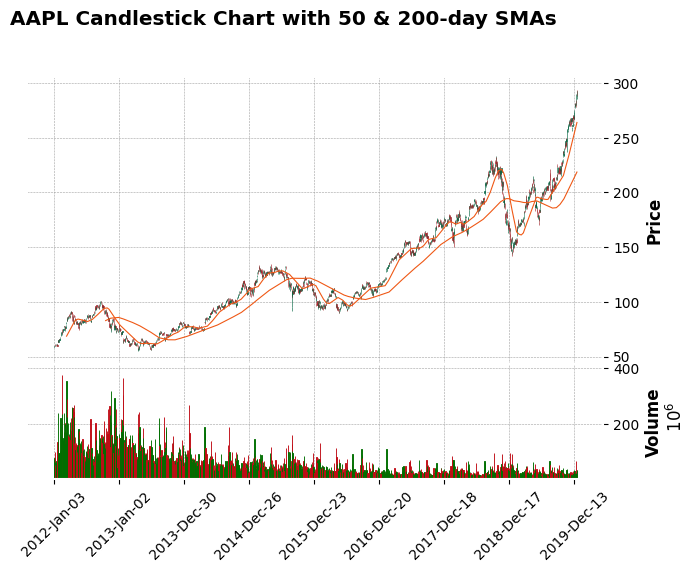

In [ ]:
import mplfinance as mpf

# Preparing data for candlestick chart
stock_data = data.set_index('Date')[['Open', 'High', 'Low', 'Close', 'Volume']]

# Plotting candlestick chart with SMAs
mpf.plot(stock_data, type='candle', style='charles', volume=True,
         mav=(50, 200), title='AAPL Candlestick Chart with 50 & 200-day SMAs',
         ylabel='Price', ylabel_lower='Volume')


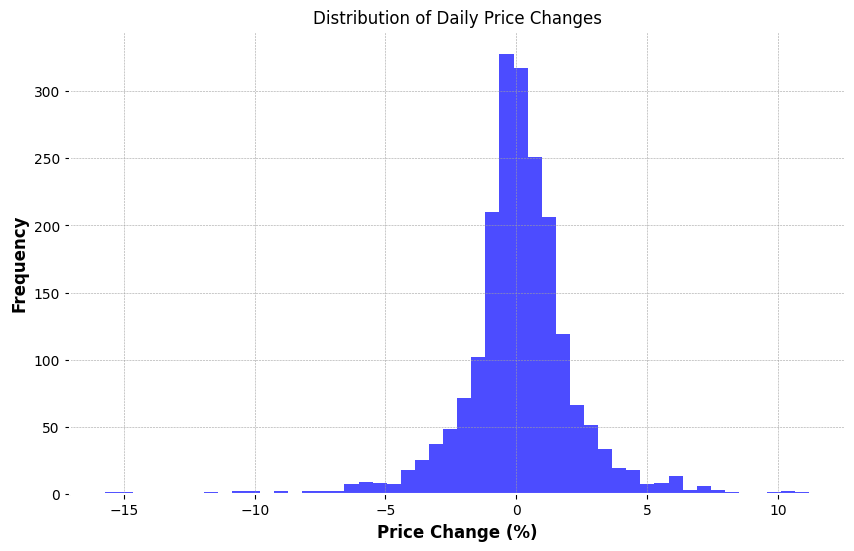

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Price_Change'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Daily Price Changes')
plt.xlabel('Price Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


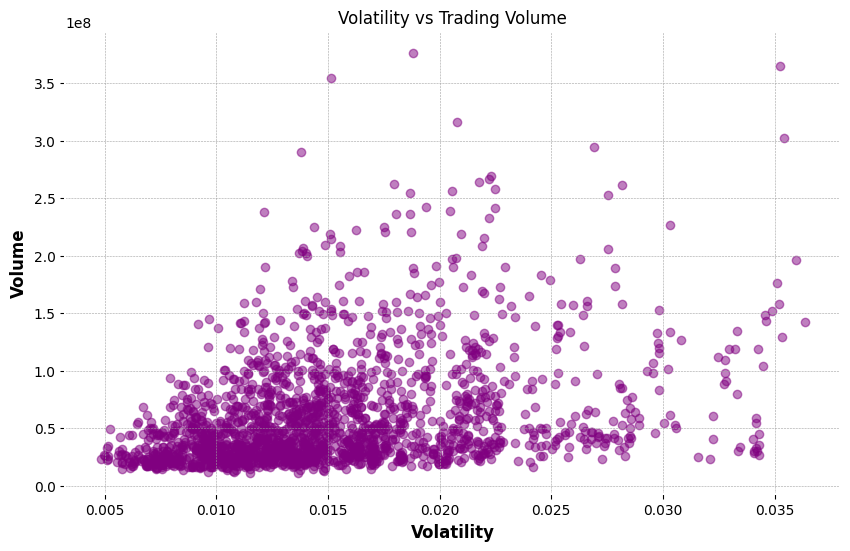

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Volatility'], data['Volume'], alpha=0.5, color='purple')
plt.title('Volatility vs Trading Volume')
plt.xlabel('Volatility')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


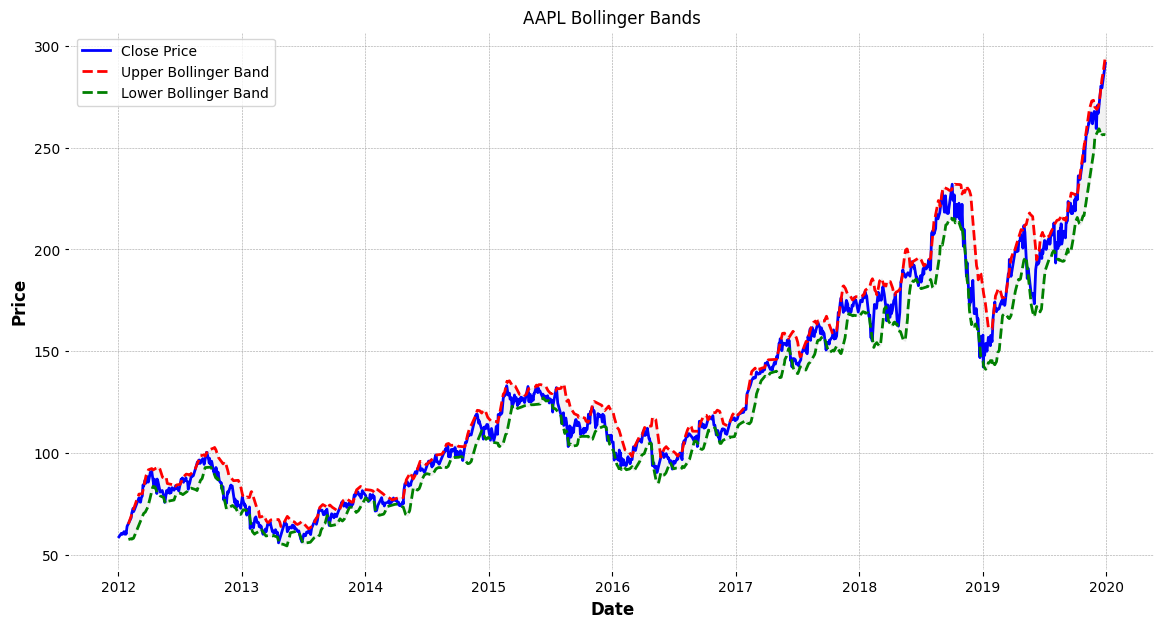

In [ ]:
# Calculate 20-day moving average and standard deviation
data['MA20'] = data['Close'].rolling(window=20).mean()
data['20_STD'] = data['Close'].rolling(window=20).std()

# Upper and lower Bollinger Bands
data['Upper_BB'] = data['MA20'] + (2 * data['20_STD'])
data['Lower_BB'] = data['MA20'] - (2 * data['20_STD'])

# Plot Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['Upper_BB'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(data['Date'], data['Lower_BB'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.fill_between(data['Date'], data['Upper_BB'], data['Lower_BB'], color='gray', alpha=0.1)
plt.title('AAPL Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


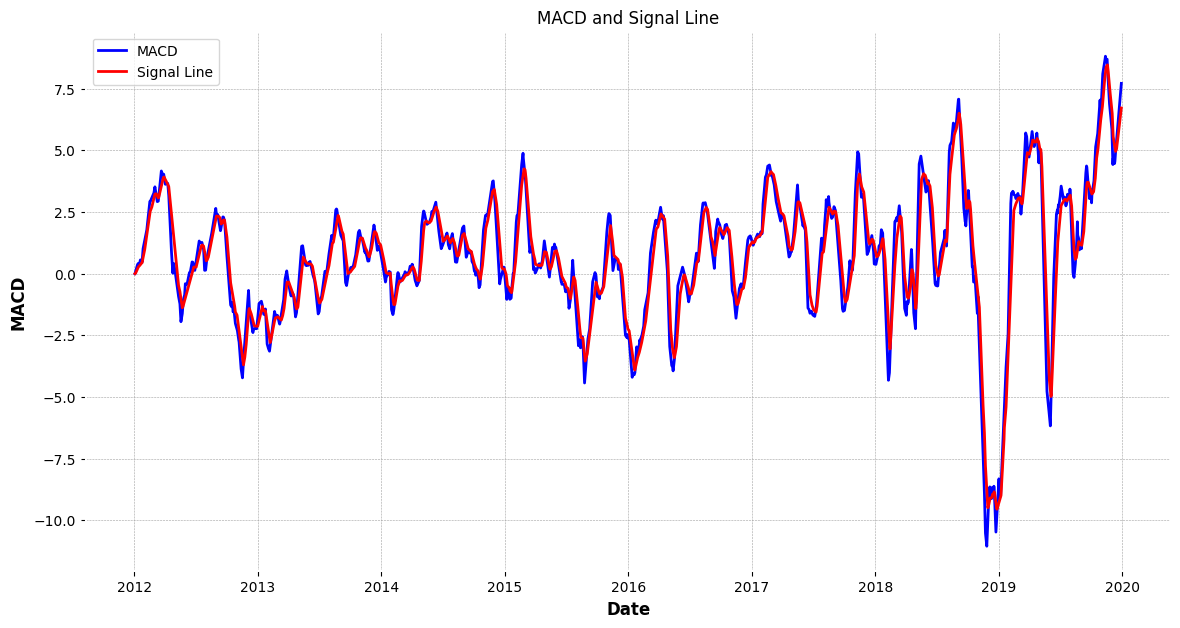

In [ ]:
# Calculate MACD (12-day EMA - 26-day EMA)
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plotting MACD and Signal Line
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['MACD'], label='MACD', color='blue')
plt.plot(data['Date'], data['Signal_Line'], label='Signal Line', color='red')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()


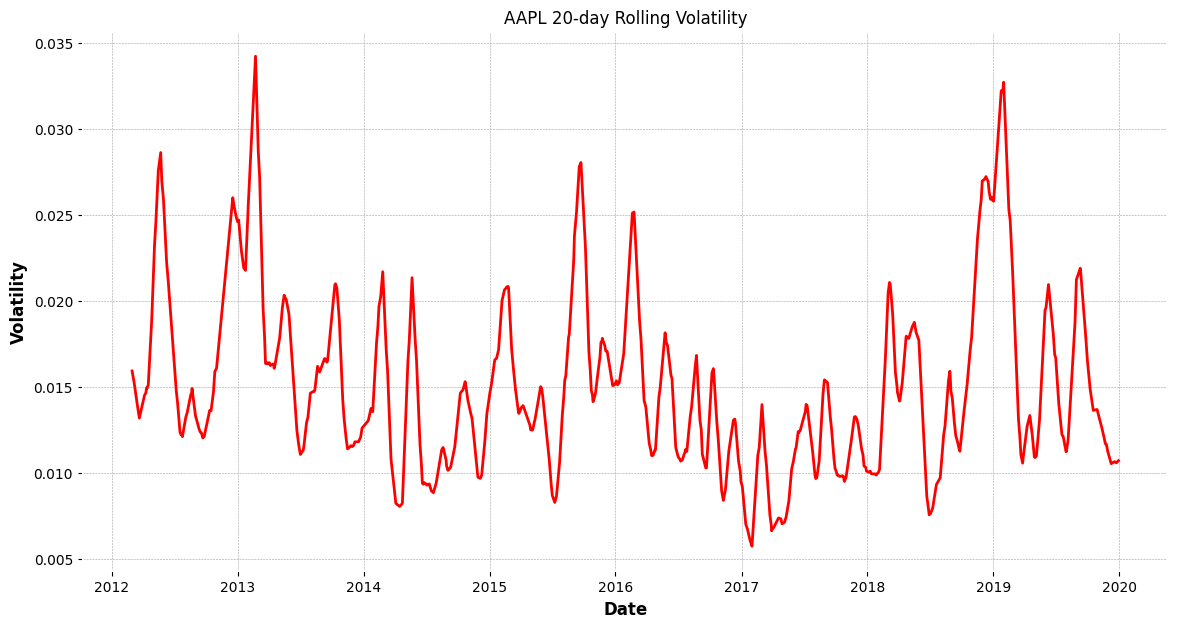

In [ ]:
# Rolling 20-day volatility
data['Rolling_Volatility'] = data['Volatility'].rolling(window=20).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Rolling_Volatility'], label='20-day Rolling Volatility', color='red')
plt.title('AAPL 20-day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


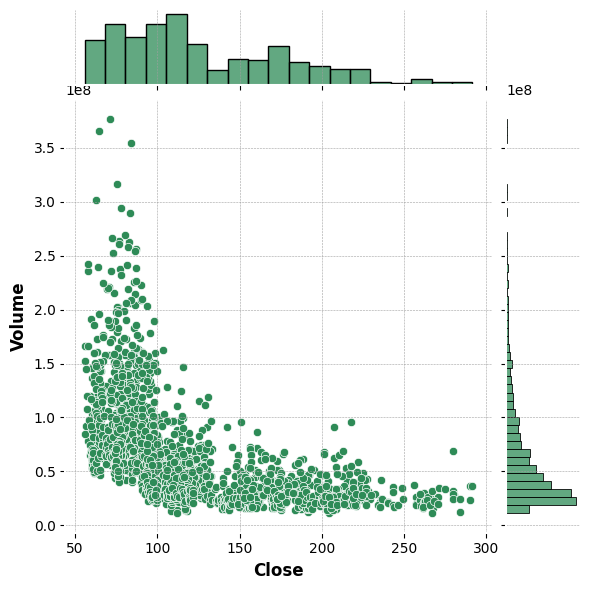

In [ ]:
sns.jointplot(x='Close', y='Volume', data= data, kind='scatter', color='seagreen')

<Axes: >

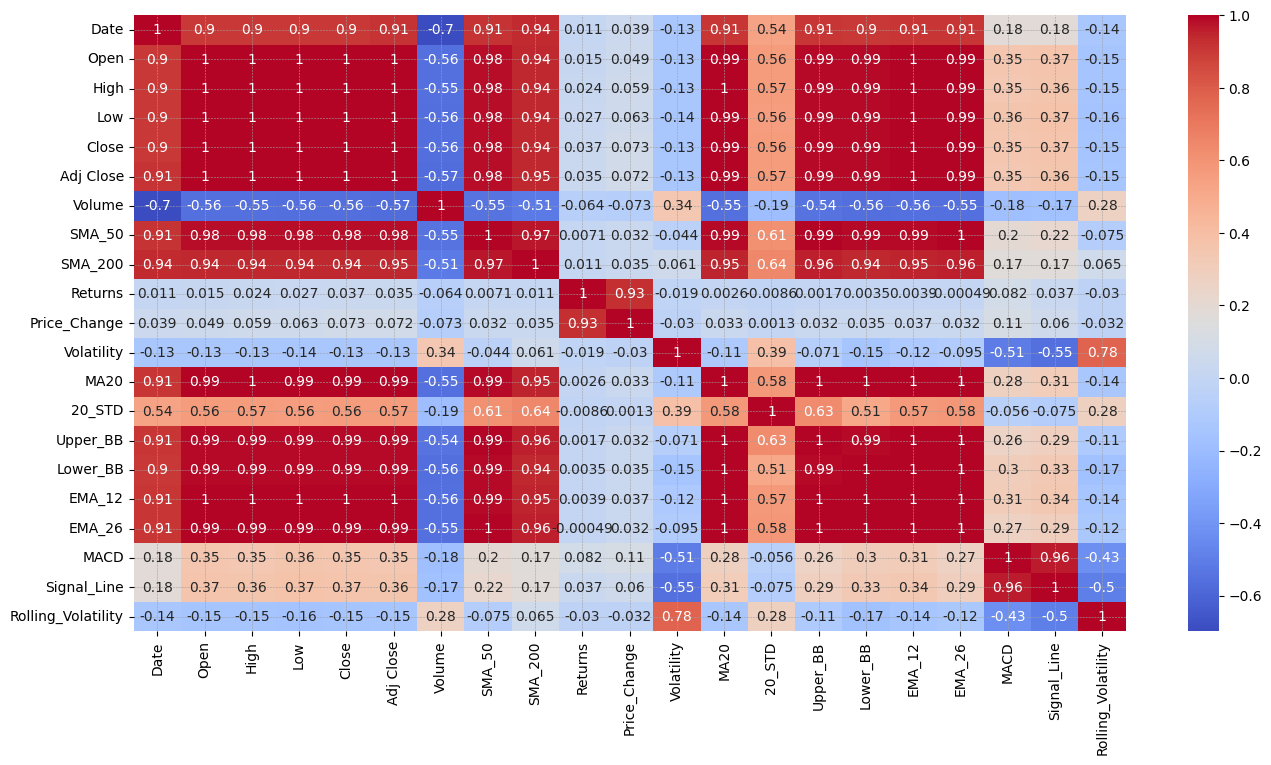

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr_matrix , annot = True , cmap = 'coolwarm')

#checking the which model suits well

In [ ]:
stock = data[['Date' , 'Close']]
stock

,Date,Close
0,2012-01-03,58.747143
1,2012-01-04,59.062859
2,2012-01-05,59.718571
3,2012-01-06,60.342857
4,2012-01-09,60.247143
...,...,...
2006,2019-12-23,284.000000
2007,2019-12-24,284.269989
2008,2019-12-26,289.910004
2009,2019-12-27,289.799988


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2011 non-null   datetime64[ns]
 1   Close   2011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.5 KB


In [ ]:
stock = stock.sort_values('Date')
stock

,Date,Close
0,2012-01-03,58.747143
1,2012-01-04,59.062859
2,2012-01-05,59.718571
3,2012-01-06,60.342857
4,2012-01-09,60.247143
...,...,...
2006,2019-12-23,284.000000
2007,2019-12-24,284.269989
2008,2019-12-26,289.910004
2009,2019-12-27,289.799988


In [ ]:
stock.set_index('Date' , inplace = True)

<Figure size 2000x800 with 0 Axes>

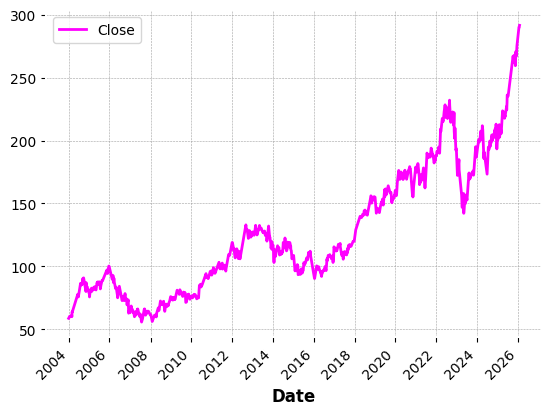

<Figure size 2000x800 with 0 Axes>

In [ ]:
stock.plot(color = 'magenta')
plt.grid(True)
# Customize x-ticks
plt.xticks(ticks=stock.index[::len(stock)//11],  # Show 3 ticks
           labels=['2004', '2006', '2008','2010','2012','2014','2016','2018','2020','2022','2024','2026'], rotation=45)
plt.figure(figsize = (20,8))

<Axes: xlabel='Date'>

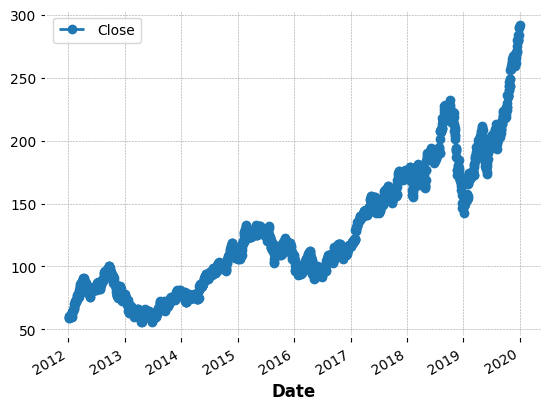

In [ ]:
stock.plot(legend=True, linestyle='--', marker='o')

<Axes: xlabel='Close', ylabel='Count'>

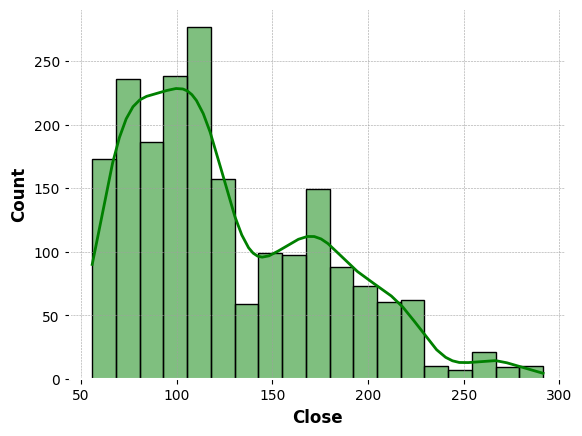

In [ ]:
sns.histplot(data['Close'] , kde = True ,color = 'green')
#sns.lineplot(data['Close'])

#checking the data whether it is stationary or not stationary

In [ ]:
x = stock['Close'].resample('MS').mean()

<Axes: xlabel='Date'>

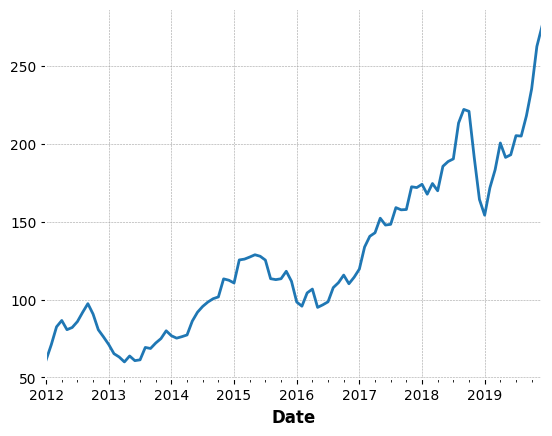

In [ ]:
x.plot()

In [ ]:
import statsmodels.api as sm

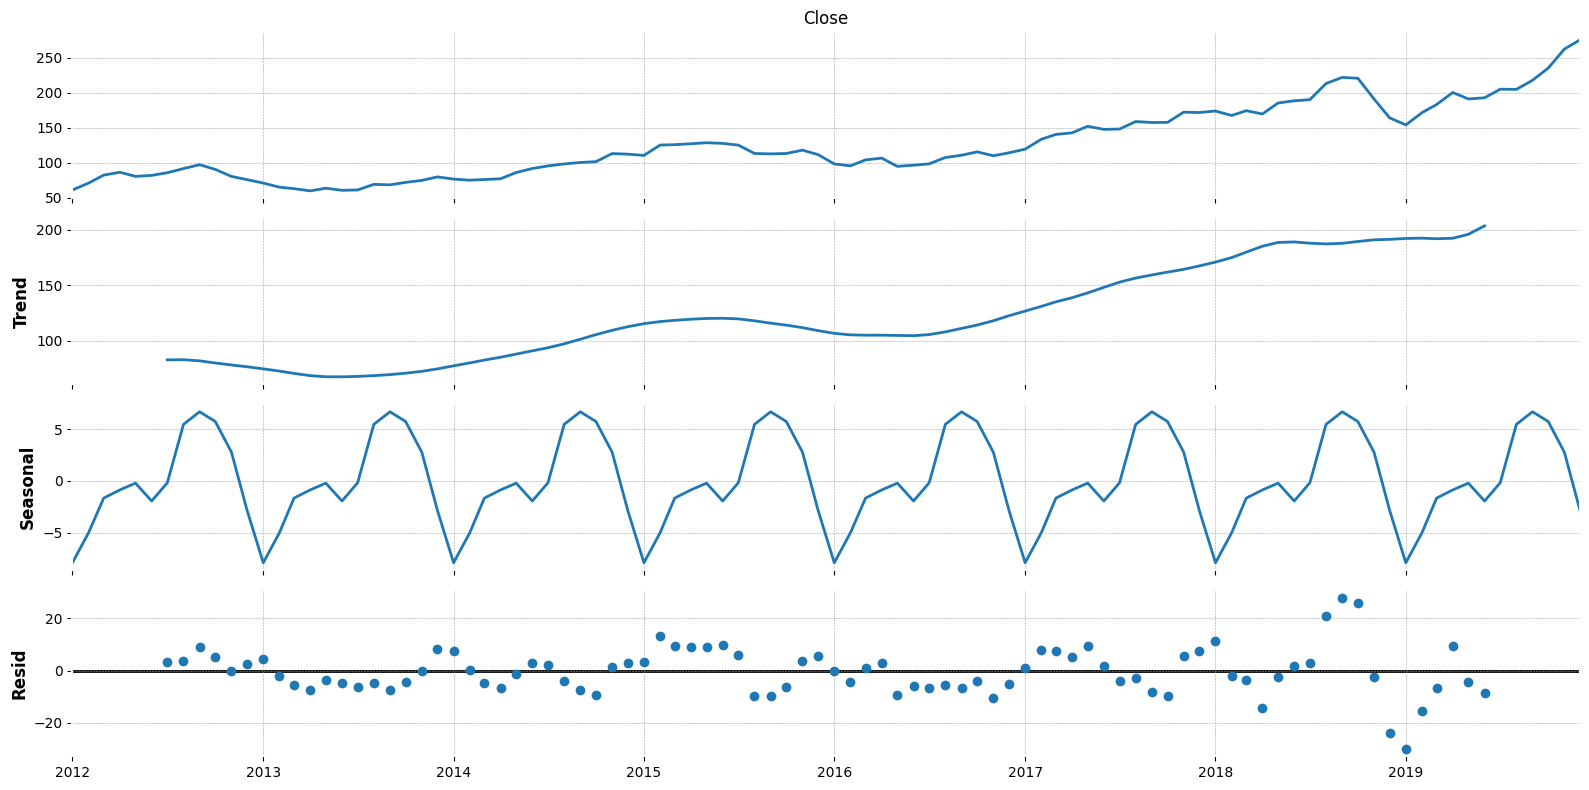

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,8
decompose = sm.tsa.seasonal_decompose(x , model = 'additive')
fig = decompose.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(stock)
print(result)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


(1.2193701254378013, 0.9961170178032009, 9, 2001, {'1%': -3.433622218212895, '5%': -2.8629854902259004, '10%': -2.5675395171404802}, 8633.09680956294)
ADF Statistic: 1.2193701254378013
p-value: 0.9961170178032009


-- In the adfuller test ,  p value > 0.05 , so the data is non stationary

In [ ]:
from statsmodels.tsa.stattools import kpss

kpss_stat, p_value, _, _ = kpss(stock)
print('KPSS Statistic:', kpss_stat)
print('p-value:', p_value)


KPSS Statistic: 5.980320259254141
p-value: 0.01


<ipython-input-40-88687816571f>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, _, _ = kpss(stock)


-- In the kpss test p value < 0.05 means non stationary

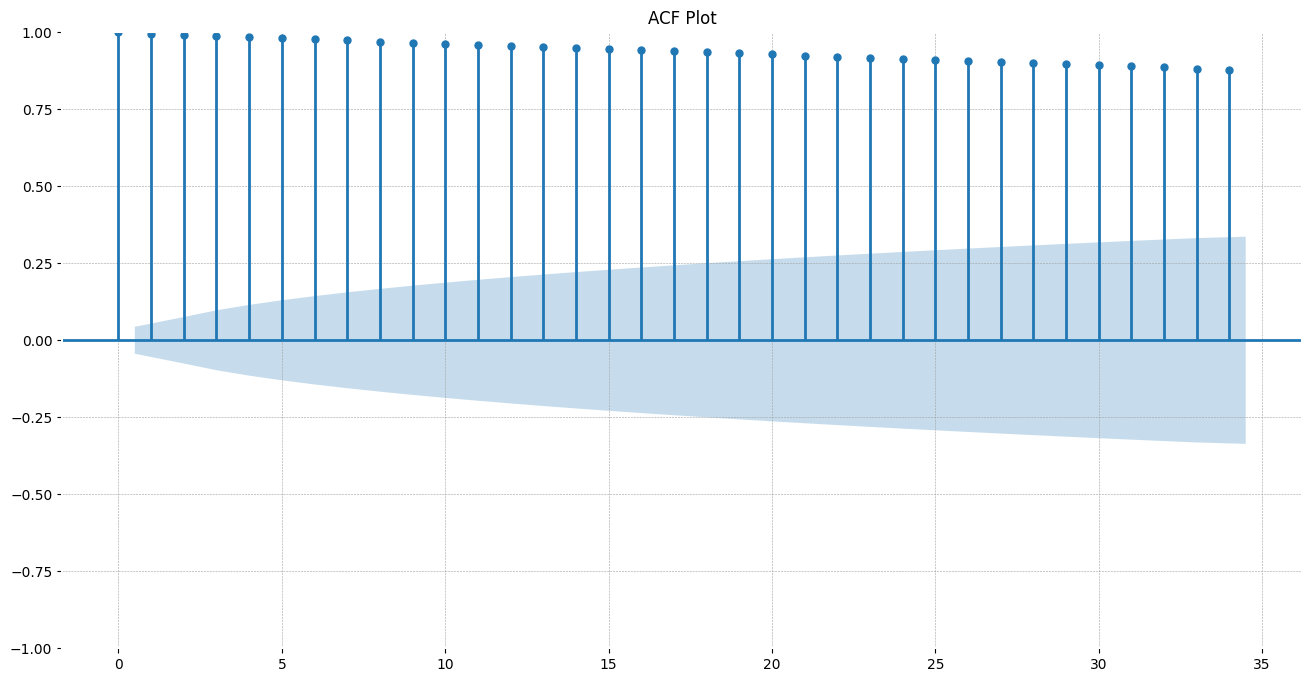

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

plot_acf(stock)
plt.title('ACF Plot')
plt.show()


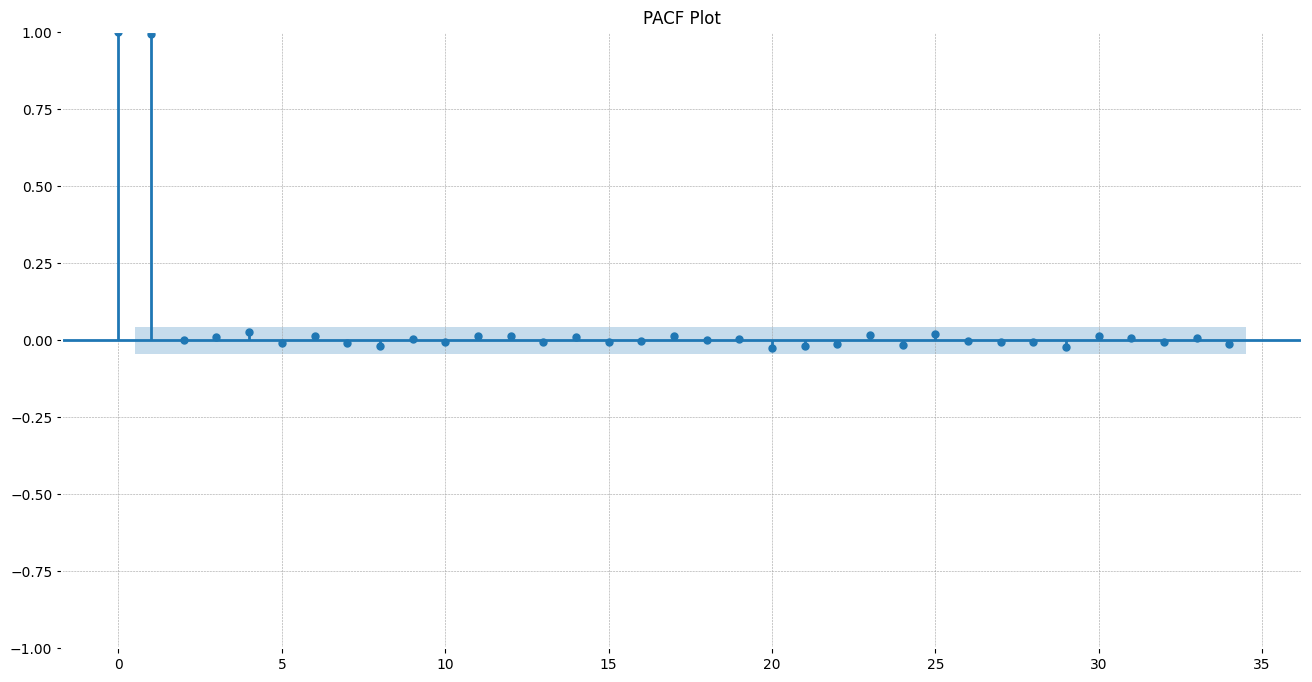

In [ ]:
plot_pacf(stock)
plt.title('PACF Plot')
plt.show()

#MODEL BUILDING

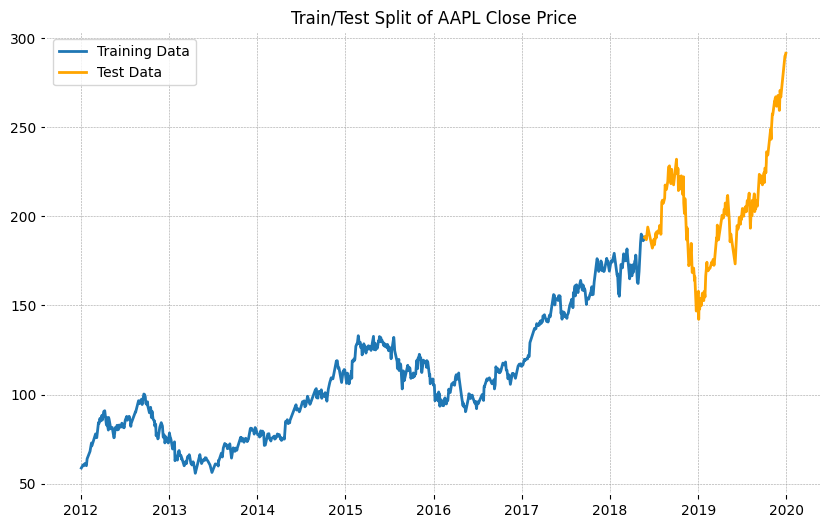

In [ ]:
# Use the 'Close' price for modeling
ts_data = stock['Close']

# Split into train and test sets (80% train, 20% test)
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', color='orange')
plt.title('Train/Test Split of AAPL Close Price')
plt.legend()
plt.show()


#Statistical models - ARIMA , SARIMA , ETS

#1. ARIMA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

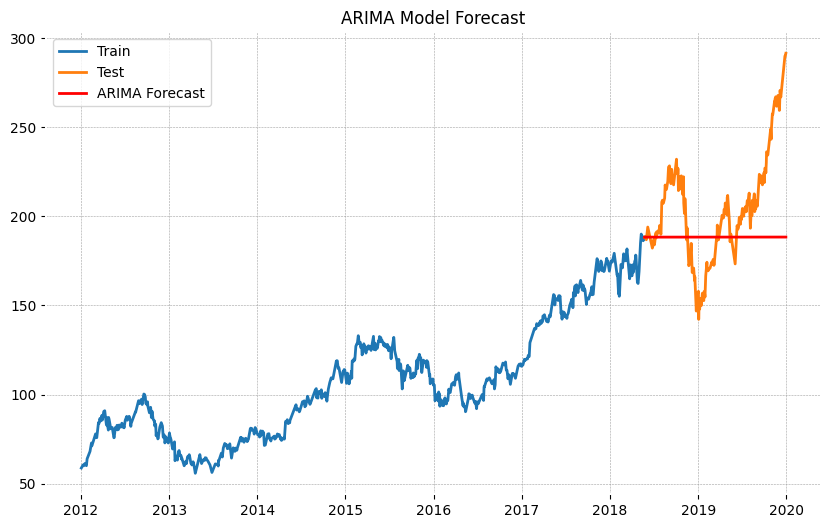

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p,d,q)
arima_model = ARIMA(train, order=(2,1,2))
arima_fit = arima_model.fit()

# Forecasting the test set
arima_forecast = arima_fit.forecast(steps=len(test))

# Plot forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# RMSE and MAE for ARIMA (as an example)
rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))
mae_arima = mean_absolute_error(test, arima_forecast)

print("AIAMA MODEL")

print(f'ARIMA RMSE: {rmse_arima}')
print(f'ARIMA MAE: {mae_arima}')


AIAMA MODEL
ARIMA RMSE: 34.05648043741983
ARIMA MAE: 25.406207760362143


#2. SARIMA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


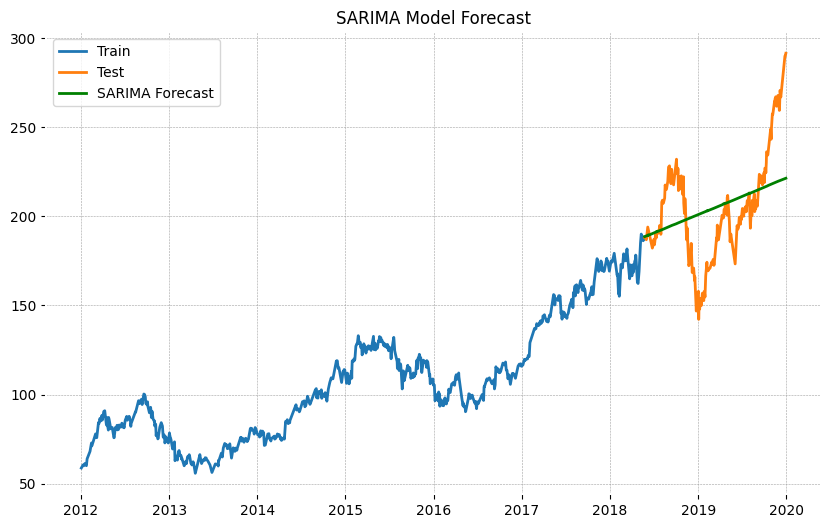

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (p,d,q) x (P,D,Q,s) with seasonal components
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Forecasting
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Plot forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()


In [ ]:
rmse_sarima = np.sqrt(mean_squared_error(test, sarima_forecast))
mae_sarima = mean_absolute_error(test, sarima_forecast)

print("SARIMA MODEL")

print(f'SARIMA RMSE: {rmse_sarima}')
print(f'SARIMA MAE: {mae_sarima}')

SARIMA MODEL
SARIMA RMSE: 26.345759740651772
SARIMA MAE: 20.788426054088294


#3.ETS - Exponential Smoothing Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


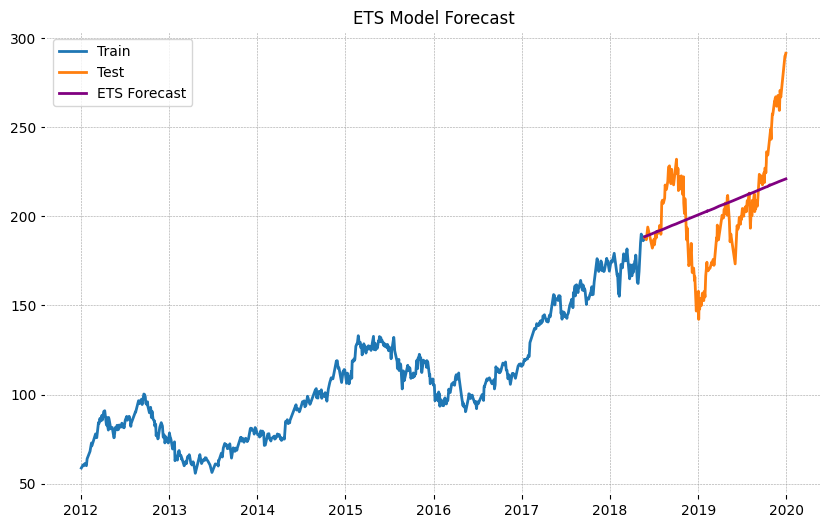

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model (additive for trend/seasonality)
ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
ets_fit = ets_model.fit()

# Forecasting
ets_forecast = ets_fit.forecast(steps=len(test))

# Plot forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, ets_forecast, label='ETS Forecast', color='purple')
plt.title('ETS Model Forecast')
plt.legend()
plt.show()


In [ ]:
rmse_ets = np.sqrt(mean_squared_error(test, ets_forecast))
mae_ets = mean_absolute_error(test, ets_forecast)

print("ETS MODEL")

print(f'ETS RMSE: {rmse_ets}')
print(f'ETS MAE: {mae_ets}')

ETS MODEL
ETS RMSE: 26.3694495089446
ETS MAE: 20.771609798889433


#Deep Learning Models - RNN , GRU , LSTM

In [ ]:
!pip install keras

#4. RNN - Recuurent Neural Network Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0071
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.8911e-04
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.2549e-04
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.8161e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3147e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2567e-04
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3765e-04
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0623e-04
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2395e-04
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.2885e-05
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0019e-04
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1206e-04
Epoch 13/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 8.5423e-05
Epoch 14/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.5001e-05
E

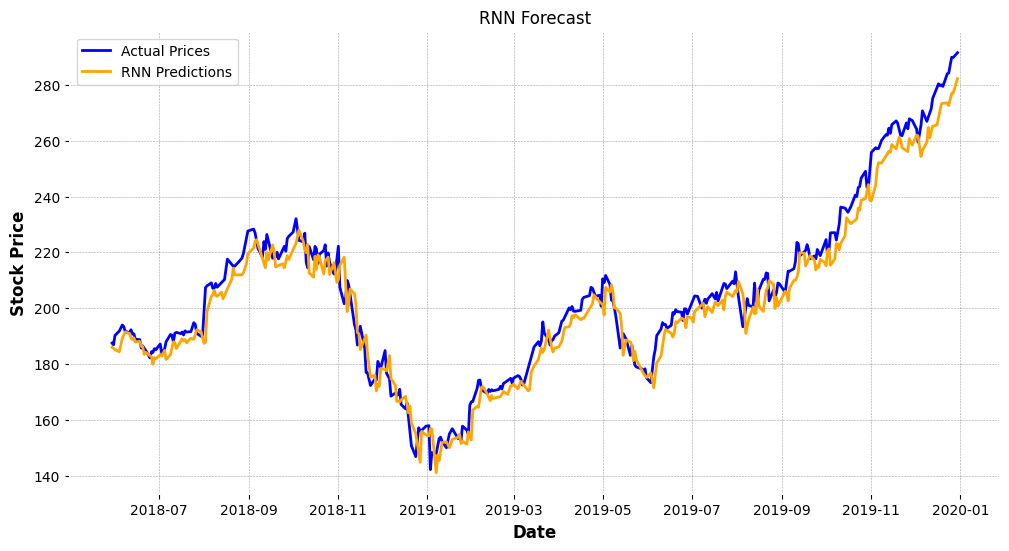

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU

# Prepare data from your 'stock' DataFrame
# Assuming 'stock' has a datetime index and a 'close' column
data = stock['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and testing datasets
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10  # Number of previous time steps to consider
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for RNN input

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# RNN Model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, return_sequences=False, input_shape=(time_step, 1)))
model_rnn.add(Dense(1))

model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
model_rnn.fit(X_train, y_train, epochs=50, batch_size=16)

# Make predictions with RNN
predicted_rnn = model_rnn.predict(X_test)
predicted_rnn = scaler.inverse_transform(predicted_rnn)

# Plot RNN results
plt.figure(figsize=(12, 6))
plt.plot(stock.index[-len(y_test):], stock['Close'].values[-len(y_test):], label='Actual Prices', color='blue')
plt.plot(stock.index[-len(y_test):], predicted_rnn, label='RNN Predictions', color='orange')
plt.title('RNN Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
mse_rnn = mean_squared_error(stock['Close'].values[-len(y_test):], predicted_rnn)
mae_rnn = mean_absolute_error(stock['Close'].values[-len(y_test):], predicted_rnn)
rmse_rnn = np.sqrt(mse_rnn)

print(f'RNN for Mean Squared Error: {mse_rnn}')
print(f'RNN for  Mean Absolute Error: {mae_rnn}')
print(f'RNN for root Mean Squared Error: {rmse_rnn}')

RNN for Mean Squared Error: 38.362875062041425
RNN for  Mean Absolute Error: 5.093491381208496
RNN for root Mean Squared Error: 6.1937771240206425


#5. GRU - Gated Recurrent unit Model

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0176
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2862e-04
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2508e-04
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.1107e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.0575e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.1580e-04
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0998e-04
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.2781e-05
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.5188e-05
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.4642e-05
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0166e-04
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.5233e-05
Epoch 13/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.0096e-05
Epoch 14/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.3782e-05
Epoch

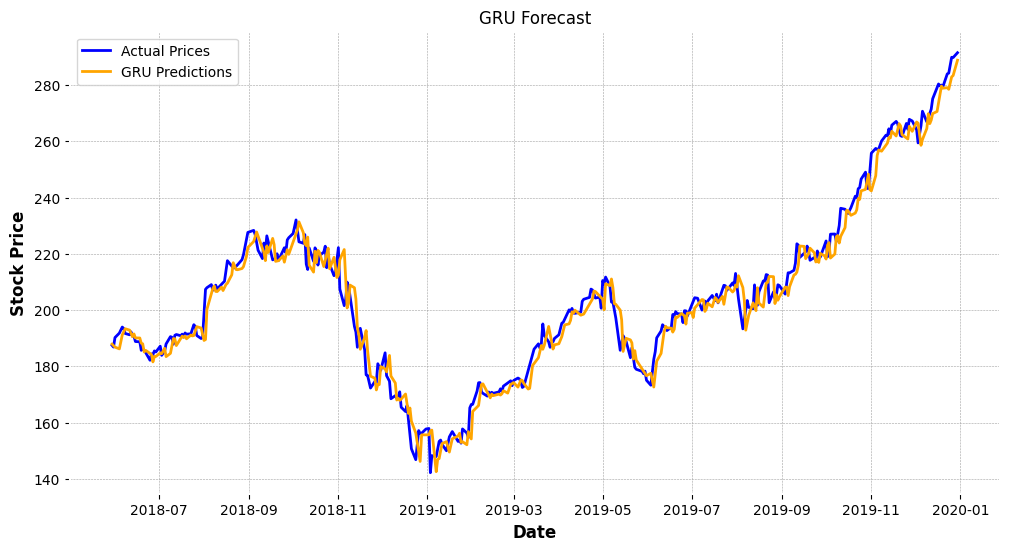

In [ ]:
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=False, input_shape=(time_step, 1)))
model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
model_gru.fit(X_train, y_train, epochs=50, batch_size=16)

# Make predictions with GRU
predicted_gru = model_gru.predict(X_test)
predicted_gru = scaler.inverse_transform(predicted_gru)

# Plot GRU results
plt.figure(figsize=(12, 6))
plt.plot(stock.index[-len(y_test):], stock['Close'].values[-len(y_test):], label='Actual Prices', color='blue')
plt.plot(stock.index[-len(y_test):], predicted_gru, label='GRU Predictions', color='orange')
plt.title('GRU Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
mse_gru = mean_squared_error(stock['Close'].values[-len(y_test):], predicted_gru)
mae_gru = mean_absolute_error(stock['Close'].values[-len(y_test):], predicted_gru)
rmse_gru = np.sqrt(mse_gru)

print(f'GRU Mean Squared Error: {mse_gru}')
print(f'GRU Mean Absolute Error: {mae_gru}')
print(f'GRU for root Mean Squared Error: {rmse_gru}')

GRU Mean Squared Error: 24.673071452382374
GRU Mean Absolute Error: 3.843981962585449
GRU for root Mean Squared Error: 4.967199558340934


#6. LSTM Model

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0152
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5555e-04
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2452e-04
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1476e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8781e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0096e-04
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0119e-04
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7308e-04
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7690e-04
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8060e-04
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6344e-04
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5625e-04
Epoch 13/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6699e-04
Epoch 14/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5848e-04
Epoch 15/50
100/

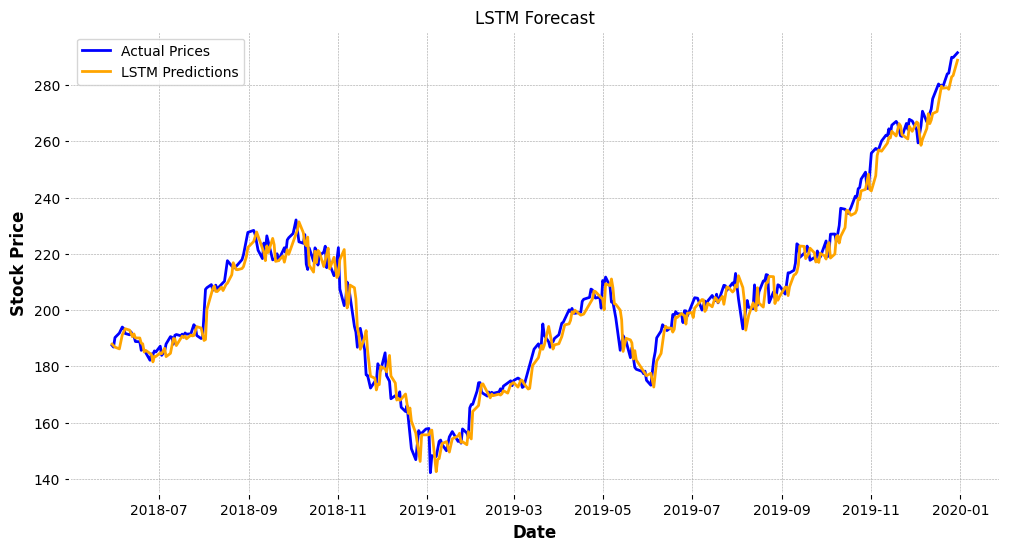

In [ ]:
from keras.layers import Dense, LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=False, input_shape=(time_step, 1)))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
model_lstm.fit(X_train, y_train, epochs=50, batch_size=16)

# Make predictions with GRU
predicted_lstm = model_lstm.predict(X_test)
predicted_lstm = scaler.inverse_transform(predicted_lstm)

# Plot GRU results
plt.figure(figsize=(12, 6))
plt.plot(stock.index[-len(y_test):], stock['Close'].values[-len(y_test):], label='Actual Prices', color='blue')
plt.plot(stock.index[-len(y_test):], predicted_gru, label='LSTM Predictions', color='orange')
plt.title('LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
mse_lstm = mean_squared_error(stock['Close'].values[-len(y_test):], predicted_lstm)
mae_lstm = mean_absolute_error(stock['Close'].values[-len(y_test):], predicted_lstm)
rmse_lstm = np.sqrt(mse_lstm)

print(f'LSTM Mean Squared Error: {mse_lstm}')
print(f'LSTM Mean Absolute Error: {mae_lstm}')
print(f'LSTM for root Mean Squared Error: {rmse_lstm}')

LSTM Mean Squared Error: 24.89286201354785
LSTM Mean Absolute Error: 3.762686891855469
LSTM for root Mean Squared Error: 4.989274698144797


In [ ]:
import pickle
# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler saved successfully!")

Scaler saved successfully!


In [ ]:
# Now save the model in a pickle file
with open('lstm_model.pkl', 'wb') as f:
    pickle.dump(model_lstm, f)

#7. prophet forecasting

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkml7y0bo/ubczzue6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkml7y0bo/js14czdv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33034', 'data', 'file=/tmp/tmpkml7y0bo/ubczzue6.json', 'init=/tmp/tmpkml7y0bo/js14czdv.json', 'output', 'file=/tmp/tmpkml7y0bo/prophet_modelgx4na4k7/prophet_model-20241108101009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:10:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


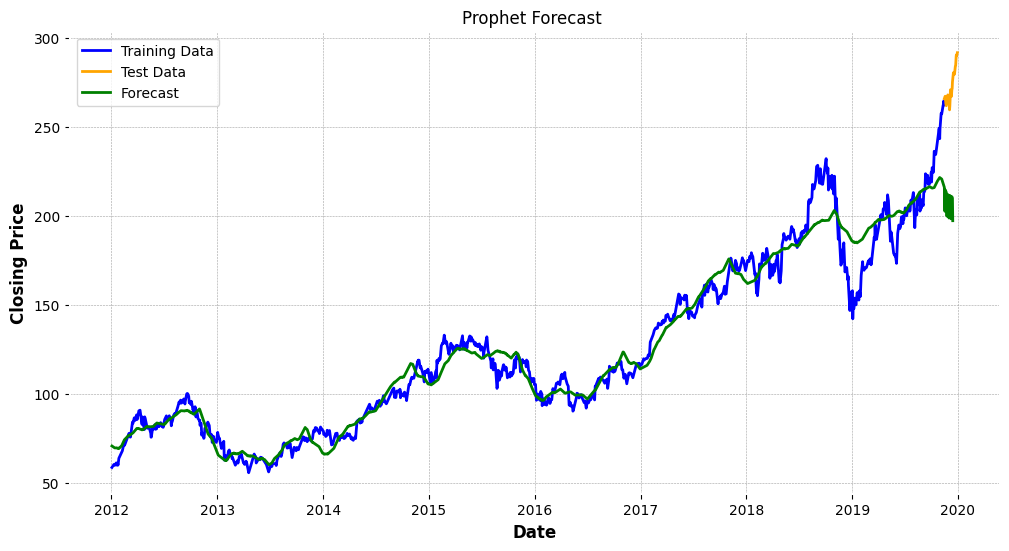

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
df = stock[['Close']].reset_index()  # Reset the index to turn the date index into a column
df.columns = ['ds', 'y']  # Rename columns for Prophet

# Split the data into training and test sets
train = df[:-30]  # Use all but the last 30 days for training
test = df[-30:]   # Last 30 days for testing

# Initialize and fit the model
model = Prophet()
model.fit(train)

# Create a dataframe for future predictions (for the next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Extract the predicted values for the test period
predictions = forecast[['ds', 'yhat']].tail(30)  # Get the last 30 predictions
predictions = predictions['yhat'].values  # Extract the predicted values as an array

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')
plt.plot(test['ds'], test['y'], label='Test Data', color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='green')
plt.title('Prophet Forecast ')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse_prophet = mean_squared_error(test['y'], predictions)
print(f'Mean Squared Error: {mse_prophet}')

mae_prophet = mean_absolute_error(test['y'], predictions)
print(f'Mean absolute Error: {mae_prophet}')

rmse_prophet = np.sqrt(mean_squared_error(test['y'], predictions))
print(f'root Mean Squared Error: {rmse_prophet}')

Mean Squared Error: 4222.348206483415
Mean absolute Error: 63.846119910804916
root Mean Squared Error: 64.97959838659682


#8. NAIVE Forecasting

Naive Forecasting Mean Squared Error: 459.19679966083555
Naive Forecasting Mean Absolute Error: 19.344323733333344


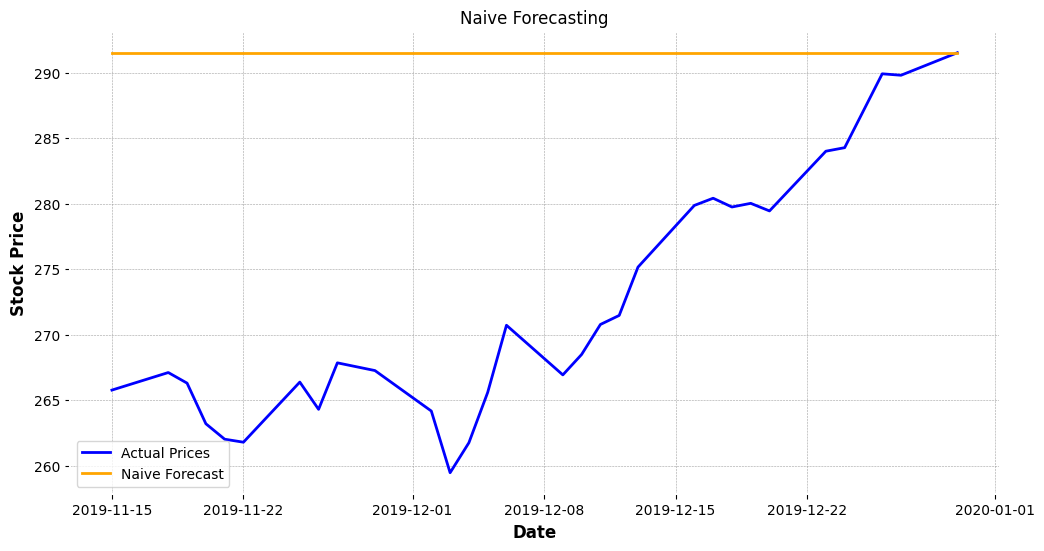

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming 'stock' is your DataFrame with a 'close' column and a datetime index
# Load your stock data if not already loaded
# stock = pd.read_csv('your_stock_data.csv', parse_dates=['date'], index_col='date')

# Prepare the test set (last 30 days for example)
test_size = 30
y_test = stock['Close'].values[-test_size:]  # Actual values to compare against

# Naive Forecast: use the last observed value for all future predictions
naive_forecast = np.repeat(stock['Close'].values[-1], test_size)

# Calculate MSE and MAE
mse_naive = mean_squared_error(y_test, naive_forecast)
mae_naive = mean_absolute_error(y_test, naive_forecast)
rmse_naive = np.sqrt(mse_naive)

print(f'Naive Forecasting Mean Squared Error: {mse_naive}')
print(f'Naive Forecasting Mean Absolute Error: {mae_naive}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(stock.index[-test_size:], y_test, label='Actual Prices', color='blue')
plt.plot(stock.index[-test_size:], naive_forecast, label='Naive Forecast', color='orange')
plt.title('Naive Forecasting')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


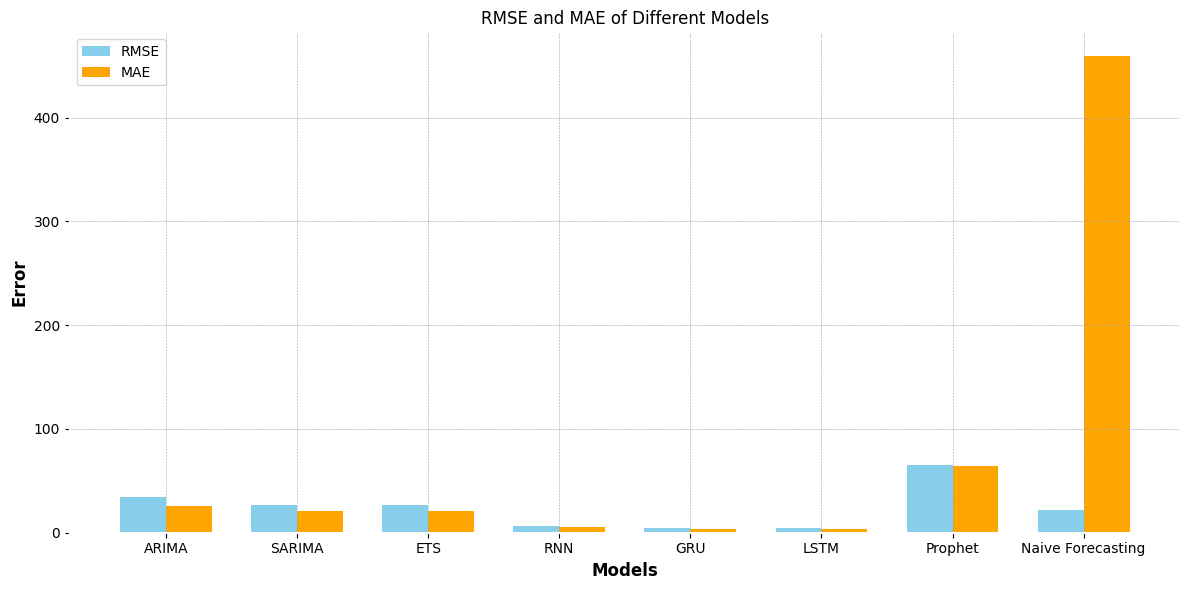

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: replace with your actual MSE and MAE values for each model
model_names = ['ARIMA' , 'SARIMA' , 'ETS' , 'RNN' , 'GRU' , 'LSTM' , 'Prophet' , 'Naive Forecasting']
mse_values = [rmse_arima , rmse_sarima , rmse_ets ,rmse_rnn , rmse_gru , rmse_lstm ,rmse_prophet , rmse_naive]  # Example MSE values
mae_values = [mae_arima , mae_sarima , mae_ets ,mae_rnn , mae_gru  , mae_lstm , mae_prophet ,mse_naive]  # Example MAE values

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create bar positions
x = np.arange(len(model_names))

# Width of the bars
width = 0.35

# Plot MSE values
bar1 = ax.bar(x - width/2, mse_values, width, label='RMSE', color='skyblue')

# Plot MAE values
bar2 = ax.bar(x + width/2, mae_values, width, label='MAE', color='orange')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Error')
ax.set_title('RMSE and MAE of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
